In [1]:
# 주로 사용하는 코드 2 : 인식한 GPU 개수 출력
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10,mnist
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Activation,Input,BatchNormalization,Flatten, Dense, Conv2D, MaxPool2D,Dropout,GlobalAveragePooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import scipy


ERROR! Session/line number was not unique in database. History logging moved to new session 84


In [5]:
def cifar10_load_data():  
    (train_validation_images, train_validation_labels), (test_images, test_labels) \
    = cifar10.load_data()
    
    train_validation_images = train_validation_images.reshape(-1,32,32,3)
    test_images = test_images.reshape(-1,32,32,3)
    
    train_validation_images = train_validation_images / 255.
    test_images = test_images / 255.
    
    n_train_validation = train_validation_images.shape[0]
    train_ratio = 0.8
    n_train = int(n_train_validation * train_ratio)
    
    train_x = train_validation_images[:n_train]
    train_y = train_validation_labels[:n_train]
    validation_x = train_validation_images[n_train:]
    validation_y = train_validation_labels[n_train:]
    test_x = test_images
    test_y = test_labels
    
    print('Train set')
    print('Image :', train_x.shape)
    print('Label :', train_y.shape)
    print('Validation set')
    print('Image :', validation_x.shape)
    print('Label :', validation_y.shape)
    print('Train & validation set')
    print('Image :', test_x.shape)
    print('Label :', test_y.shape)
    
    return train_x, train_y, validation_x, validation_y, test_x, test_y

In [20]:
train_x, train_y, validation_x, validation_y, test_x, test_y=cifar10_load_data()

model=Sequential()
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same',activation='relu',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=36,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))

model.summary()


Train set
Image : (40000, 32, 32, 3)
Label : (40000, 1)
Validation set
Image : (10000, 32, 32, 3)
Label : (10000, 1)
Train & validation set
Image : (10000, 32, 32, 3)
Label : (10000, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 24)        672       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 24)        96        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 24)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 36)        7812      
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 36)        144       
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(train_x,train_y,batch_size=64,epochs=50,verbose=2,validation_data=(validation_x,validation_y))

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 - 2s - loss: 1.4828 - accuracy: 0.4660 - val_loss: 1.9878 - val_accuracy: 0.3467
Epoch 2/50
40000/40000 - 2s - loss: 1.1840 - accuracy: 0.5785 - val_loss: 1.2714 - val_accuracy: 0.5576
Epoch 3/50
40000/40000 - 2s - loss: 1.0671 - accuracy: 0.6217 - val_loss: 1.2627 - val_accuracy: 0.5398
Epoch 4/50
40000/40000 - 2s - loss: 0.9911 - accuracy: 0.6497 - val_loss: 0.9860 - val_accuracy: 0.6554
Epoch 5/50
40000/40000 - 2s - loss: 0.9410 - accuracy: 0.6686 - val_loss: 0.9395 - val_accuracy: 0.6669
Epoch 6/50
40000/40000 - 2s - loss: 0.9006 - accuracy: 0.6876 - val_loss: 1.0731 - val_accuracy: 0.6169
Epoch 7/50
40000/40000 - 2s - loss: 0.8746 - accuracy: 0.6909 - val_loss: 1.0885 - val_accuracy: 0.6130
Epoch 8/50
40000/40000 - 2s - loss: 0.8453 - accuracy: 0.7020 - val_loss: 1.1388 - val_accuracy: 0.5936
Epoch 9/50
40000/40000 - 2s - loss: 0.8270 - accuracy: 0.7090 - val_loss: 0.9147 - val_accuracy: 0.6776
Epoch 10/50
40

In [22]:
# Evaluate on the test set after training
result = model.evaluate(test_x, test_y)
print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1]*100))

10000/10000 [==============================] - 0s 34us/sample - loss: 0.8461 - accuracy: 0.7123
Test loss : 0.8461	 Test accuracy : 71.23%


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


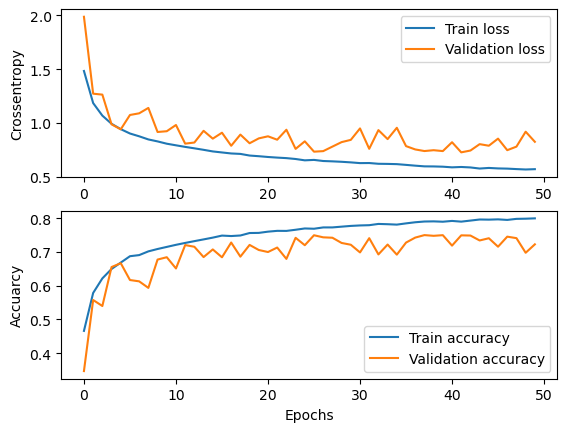

In [23]:
fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

Probability is [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


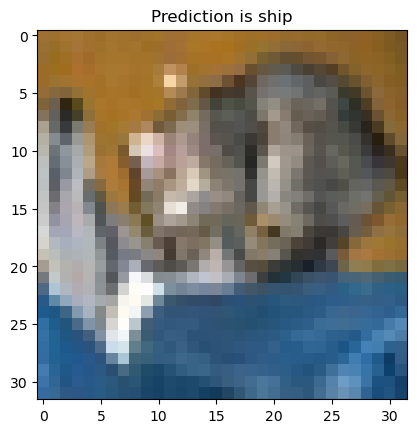

In [26]:
prediction=model.predict(test_x)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_name=classes[np.argmax(prediction[0])]
plt.imshow(test_x[0],'gray')
print('Probability is {}'.format(prediction[0].round()))
plt.title('Prediction is {}'.format(class_name))
plt.show()

In [30]:
def mnist_load_data():  
    (train_validation_images, train_validation_labels), (test_images, test_labels) \
    = mnist.load_data()
    
    train_validation_images = train_validation_images.reshape(-1,28,28,1)
    test_images = test_images.reshape(-1,28,28,1)
    
    train_validation_images = train_validation_images / 255.
    test_images = test_images / 255.
    
    n_train_validation = train_validation_images.shape[0]
    train_ratio = 0.8
    n_train = int(n_train_validation * train_ratio)
    
    train_x = train_validation_images[:n_train]
    train_y = train_validation_labels[:n_train]
    validation_x = train_validation_images[n_train:]
    validation_y = train_validation_labels[n_train:]
    test_x = test_images
    test_y = test_labels
    
    print('Train set')
    print('Image :', train_x.shape)
    print('Label :', train_y.shape)
    print('Validation set')
    print('Image :', validation_x.shape)
    print('Label :', validation_y.shape)
    print('Train & validation set')
    print('Image :', test_x.shape)
    print('Label :', test_y.shape)
    
    return train_x, train_y, validation_x, validation_y, test_x, test_y

ERROR! Session/line number was not unique in database. History logging moved to new session 86


In [32]:
train_x, train_y, validation_x, validation_y, test_x, test_y=mnist_load_data()

model=Sequential()
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=36,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation='softmax'))

model.summary()


Train set
Image : (48000, 28, 28, 1)
Label : (48000,)
Validation set
Image : (12000, 28, 28, 1)
Label : (12000,)
Train & validation set
Image : (10000, 28, 28, 1)
Label : (10000,)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 24)        240       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 24)        96        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 36)        7812      
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 36)        144       
_________________________________________________________________
max_po

In [33]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(train_x,train_y,batch_size=64,epochs=50,verbose=2,validation_data=(validation_x,validation_y))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 - 2s - loss: 0.3547 - accuracy: 0.9196 - val_loss: 0.1257 - val_accuracy: 0.9692
Epoch 2/50
48000/48000 - 1s - loss: 0.0927 - accuracy: 0.9743 - val_loss: 0.1504 - val_accuracy: 0.9570
Epoch 3/50
48000/48000 - 2s - loss: 0.0670 - accuracy: 0.9808 - val_loss: 0.0718 - val_accuracy: 0.9790
Epoch 4/50
48000/48000 - 2s - loss: 0.0531 - accuracy: 0.9851 - val_loss: 0.0949 - val_accuracy: 0.9707
Epoch 5/50
48000/48000 - 2s - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.0535 - val_accuracy: 0.9836
Epoch 6/50
48000/48000 - 2s - loss: 0.0407 - accuracy: 0.9884 - val_loss: 0.0367 - val_accuracy: 0.9883
Epoch 7/50
48000/48000 - 2s - loss: 0.0379 - accuracy: 0.9884 - val_loss: 0.0458 - val_accuracy: 0.9868
Epoch 8/50
48000/48000 - 2s - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0479 - val_accuracy: 0.9843
Epoch 9/50
48000/48000 - 2s - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.0576 - val_accuracy: 0.9847
Epoch 10/50
48

In [34]:
# Evaluate on the test set after training
result = model.evaluate(test_x, test_y)
print('Test loss : {:.4f}\t Test accuracy : {:.2f}%'.format(result[0], result[1]*100))

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0259 - accuracy: 0.9925
Test loss : 0.0259	 Test accuracy : 99.25%


C:\Users\tlsdu\anaconda3\envs\mine\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


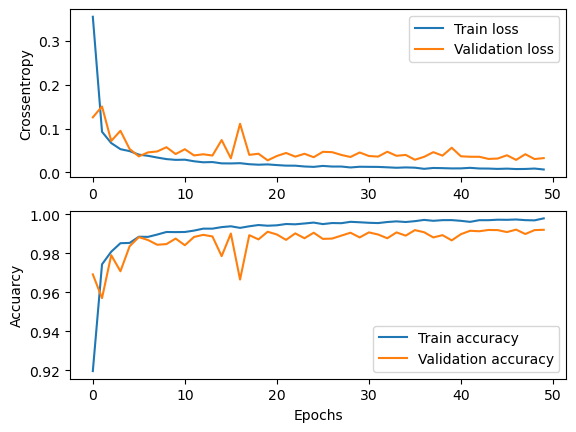

In [35]:
fig, axes = plt.subplots(2,1)

axes[0].plot(history.history['loss'], label='Train loss')
axes[0].plot(history.history['val_loss'], label='Validation loss')
axes[0].set_ylabel('Crossentropy')
axes[0].legend()

axes[1].plot(history.history['accuracy'], label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axes[1].set_ylabel('Accuarcy')
axes[1].legend()
axes[1].set_xlabel('Epochs')

fig.show()

Probability is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


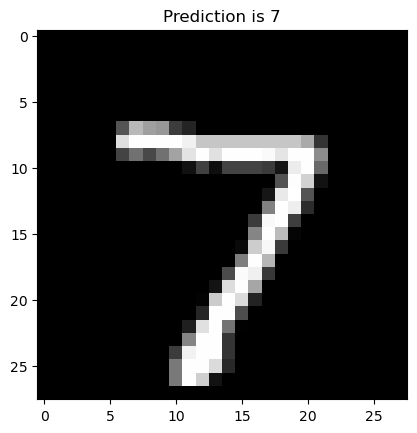

In [36]:
prediction=model.predict(test_x)
class_name=np.argmax(prediction[0])
plt.imshow(test_x[0],'gray')
print('Probability is {}'.format(prediction[0].round()))
plt.title('Prediction is {}'.format(class_name))
plt.show()

In [37]:
#construct CAM model
cam_model=Model(inputs=model.input,outputs=(model.layers[-3].output,model.layers[-1].output))
cam_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15_input (InputLayer) [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 24)        240       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 24)        96        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 24)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 36)        7812      
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 36)        144       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 36)          0     